In [52]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


### Missing Data
Find the data that is missing


In [53]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

Here we can see that the following are missing:<br>
  -     age: 12 - Numeric Data<br>
  -     job: 10 - Categorical Data<br>
  -     education: 104 - Categorical Data<br>
  -     contact: 191 - Categorical Data<br>
  -     poutcome: 454 - Categorical Data 

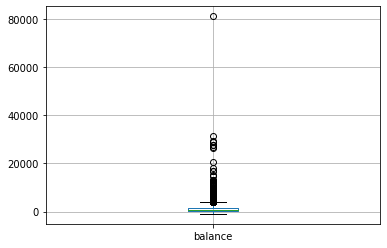

In [54]:
df.boxplot(column=['balance'])
plt.show()

In [55]:
df['age'].mean()

41.753018108651915

In [56]:
df['age'].median()

38.0

In [57]:
df['age'].mode()

0    33.0
dtype: float64